In [1]:
import rr_pso
import training_rr_pso
import covid_rr_pso

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def av_distance_from_opt(x, x_opt=None):
    if x_opt is None:
        x_opt = np.zeros(x.shape[1])
    avd = np.sqrt(np.sum((x-x_opt)**2, axis=1))
    avd = np.mean(avd)
    return avd

def av_function_value(x, function):
    avf = np.mean(function(x))
    return avf

# Griewank

In [3]:
run_num = 100
max_iter = 200
distace_arr = np.zeros(shape=(run_num, max_iter+1))
fval_arr = np.zeros(shape=(run_num, max_iter+1))

for run in range(run_num):
    X, V = training_rr_pso.training_rr_pso(criteria=lambda y: -training_rr_pso.griewank(y),
                                           xlim=np.array([-1200, 1200]),
                                           max_iter=max_iter)  
    
    distace_arr[run, :] = np.array([av_distance_from_opt(xi)
                                    for xi in X])
    fval_arr[run, :] = np.array([av_function_value(xi, function=lambda y: -training_rr_pso.griewank(y))
                                 for xi in X])

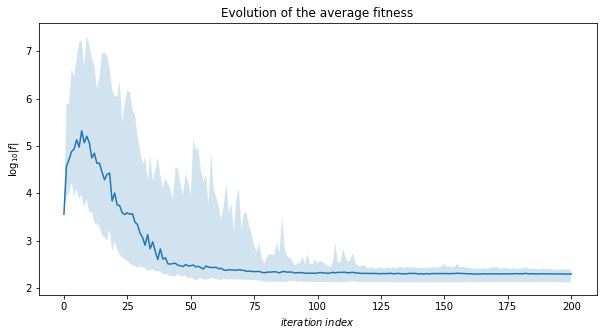

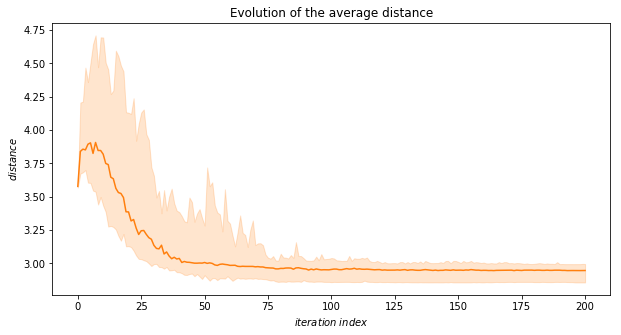

In [4]:
iters = np.arange(201)
top=.90
bot=.10

mf = np.median(fval_arr, axis=0)
mfb = np.quantile(fval_arr, bot, axis=0)
mft = np.quantile(fval_arr, top, axis=0)

plt.figure(1, [10, 5])
plt.title("Evolution of the average fitness")
plt.ylabel("$\log_{10} |f|$")
plt.xlabel("$iteration\; index$")
plt.plot(iters, np.log10(abs(mf)))
plt.fill_between(iters, np.log10(abs(mft)), np.log10(abs(mfb)), alpha=0.2)
plt.show()

md = np.median(distace_arr, axis=0)
mdb = np.quantile(distace_arr, bot, axis=0)
mdt = np.quantile(distace_arr, top, axis=0)

plt.figure(1, [10, 5])
plt.title("Evolution of the average distance")
plt.ylabel("$distance$")
plt.xlabel("$iteration\; index$")
plt.plot(iters, np.log10(md), color="C1")
plt.fill_between(iters, np.log10(mdt), np.log10(mdb), alpha=0.2, color="C1")
plt.show()

In [5]:
mf_g = mf
mfb_g = mfb
mft_g = mft

# Rosenbrock

In [6]:
run_num = 100
max_iter = 200
distace_arr = np.zeros(shape=(run_num, max_iter+1))
fval_arr = np.zeros(shape=(run_num, max_iter+1))

for run in range(run_num):
    X, V = training_rr_pso.training_rr_pso(criteria=lambda y: -training_rr_pso.rosenbrock(y),
                                           xlim=np.array([-60, 60]),
                                           max_iter=max_iter)  
    
    distace_arr[run, :] = np.array([av_distance_from_opt(xi)
                                    for xi in X])
    fval_arr[run, :] = np.array([av_function_value(xi, function=lambda y: -training_rr_pso.rosenbrock(y))
                                 for xi in X])

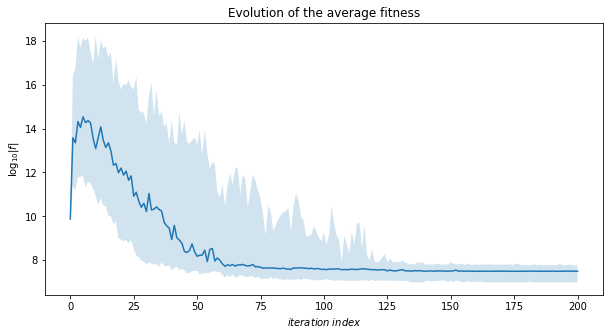

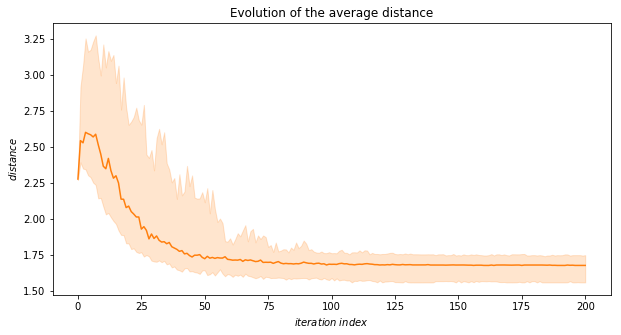

In [7]:
iters = np.arange(201)
top=.90
bot=.10

mf = np.median(fval_arr, axis=0)
mfb = np.quantile(fval_arr, bot, axis=0)
mft = np.quantile(fval_arr, top, axis=0)

plt.figure(1, [10, 5])
plt.title("Evolution of the average fitness")
plt.ylabel("$\log_{10} |f|$")
plt.xlabel("$iteration\; index$")
plt.plot(iters, np.log10(abs(mf)))
plt.fill_between(iters, np.log10(abs(mft)), np.log10(abs(mfb)), alpha=0.2)
plt.show()

md = np.median(distace_arr, axis=0)
mdb = np.quantile(distace_arr, bot, axis=0)
mdt = np.quantile(distace_arr, top, axis=0)

plt.figure(1, [10, 5])
plt.title("Evolution of the average distance")
plt.ylabel("$distance$")
plt.xlabel("$iteration\; index$")
plt.plot(iters, np.log10(md), color="C1")
plt.fill_between(iters, np.log10(mdt), np.log10(mdb), alpha=0.2, color="C1")
plt.show()

In [8]:
mf_r = mf
mfb_r = mfb
mft_r = mft

# Both

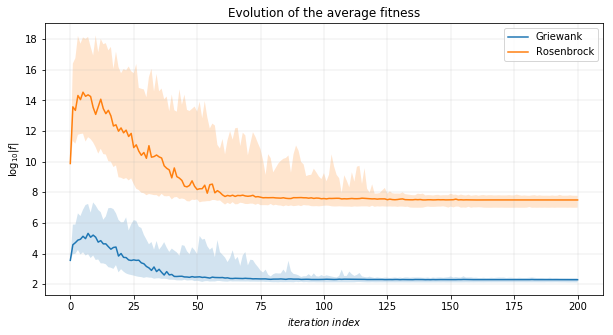

In [9]:
iters = np.arange(201)

plt.figure(1, [10, 5])
plt.title("Evolution of the average fitness")
plt.ylabel("$\log_{10} |f|$")
plt.xlabel("$iteration\; index$")

plt.plot(iters, np.log10(abs(mf_g)), label="Griewank")
plt.fill_between(iters, np.log10(abs(mft_g)), np.log10(abs(mfb_g)), alpha=0.2)

plt.plot(iters, np.log10(abs(mf_r)), label="Rosenbrock")
plt.fill_between(iters, np.log10(abs(mft_r)), np.log10(abs(mfb_r)), alpha=0.2)

plt.grid(linewidth=0.2)

plt.legend()

plt.savefig("training_fitness_evolution", dpi=300)

plt.show()

In [10]:
print("Griewank")
print("{:.1e}".format(abs(mf_g[-1])))
print("{:.1e}".format(abs(mft_g[-1])), "{:.2e}".format(abs(mfb_g[-1])))

print("Rosenbrock")
print("{:.1e}".format(abs(mf_r[-1])))
print("{:.1e}".format(abs(mft_r[-1])), "{:.1e}".format(abs(mfb_r[-1])))

Griewank
2.0e+02
1.3e+02 2.47e+02
Rosenbrock
3.2e+07
9.9e+06 5.9e+07


# Other parameters

In [3]:
run_num = 100
max_iter = 200
distace_arr = np.zeros(shape=(run_num, max_iter+1))
fval_arr = np.zeros(shape=(run_num, max_iter+1))

for run in range(run_num):
    X, V = training_rr_pso.training_rr_pso(criteria=lambda y: -training_rr_pso.griewank(y),
                                           xlim=np.array([-1200, 1200]),
                                           max_iter=max_iter,
                                           parameter_gemerator=rr_pso.parameter_generator_dt_constant)  
    
    distace_arr[run, :] = np.array([av_distance_from_opt(xi)
                                    for xi in X])
    fval_arr[run, :] = np.array([av_function_value(xi, function=lambda y: -training_rr_pso.griewank(y))
                                 for xi in X])

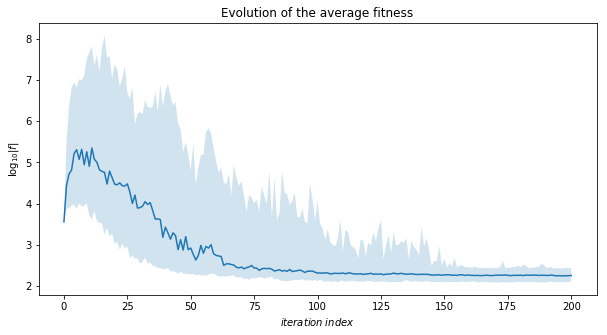

In [4]:
iters = np.arange(max_iter+1)
top=.90
bot=.10

mf = np.median(fval_arr, axis=0)
mfb = np.quantile(fval_arr, bot, axis=0)
mft = np.quantile(fval_arr, top, axis=0)

plt.figure(1, [10, 5])
plt.title("Evolution of the average fitness")
plt.ylabel("$\log_{10} |f|$")
plt.xlabel("$iteration\; index$")
plt.plot(iters, np.log10(abs(mf)))
plt.fill_between(iters, np.log10(abs(mft)), np.log10(abs(mfb)), alpha=0.2)
plt.show()

In [5]:
print("Griewank")
print("{:.1e}".format(abs(mf[-1])))
print("{:.1e}".format(abs(mft[-1])), "{:.2e}".format(abs(mfb[-1])))

Griewank
1.8e+02
1.3e+02 2.77e+02
